In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

# pd.set_option('display.max_columns', 100)

data = pd.read_csv(r'E:\project\data.csv')
test_data_1 = pd.read_csv(r'E:\project\testdata1fls.csv')
test_data_2 = pd.read_csv(r'E:\project\testdata2wls.csv')

In [8]:
data.head()

pH    EC    OC    OM    N     P    K    Zn   Fe    Cu   Mn  Sand  Silt  \
0  7.74  0.40  0.01  0.01   75  20.0  279  0.48  6.4  0.21  4.7  84.3   6.8   
1  9.02  0.31  0.02  0.03   85  15.7  247  0.27  6.4  0.16  5.6  90.4   3.9   
2  7.80  0.17  0.02  0.03   77  35.6  265  0.46  6.2  0.51  6.1  84.5   6.9   
3  8.36  0.02  0.03  0.05  106   6.4  127  0.50  3.1  0.28  2.3  93.9   1.7   
4  8.36  1.08  0.03  0.05   96  10.5   96  0.31  3.2  0.23  4.1  91.5   4.1   

   Clay  CaCO3    CEC       Output  
0   8.9   6.72   7.81      Fertile  
1   5.7   4.61   7.19      Fertile  
2   8.6   1.53  12.32      Fertile  
3   4.4   0.00   1.60  Non Fertile  
4   4.4   9.08   7.21  Non Fertile

In [9]:
test_data_1.head()

Ph    EC    OC    OM    N   P    K    Zn   Fe    Cu    Mn   Sand  Silt  \
0  7.34  0.18  0.26  0.45  172  13   90  0.28  2.6  2.10  0.80  80.99  4.69   
1  7.86  0.72  0.74  1.27  212   6  148  0.55  6.2  0.18  4.70  85.91  1.58   
2  9.00  2.36  0.77  1.33  380  58  404  3.93  4.8  3.20  2.90  83.49  5.92   
3  7.52  0.63  0.30  0.51  183  36  265  2.65  3.9  0.82  8.03  78.56  8.80   
4  8.71  1.87  0.58  1.00  290  19  584  4.00  3.5  0.09  0.70  82.21  7.74   

    Clay  CaCO3   CEC  
0  14.32   1.90  2.69  
1  12.51   4.30  4.01  
2  10.59   2.67  3.79  
3  12.64   6.41  4.64  
4  10.05   3.54  6.22

In [10]:
data.loc[data['Output']=='Non Fertile']

pH    EC    OC    OM    N     P    K    Zn   Fe    Cu   Mn  Sand  Silt  \
3   8.36  0.02  0.03  0.05  106   6.4  127  0.50  3.1  0.28  2.3  93.9   1.7   
4   8.36  1.08  0.03  0.05   96  10.5   96  0.31  3.2  0.23  4.1  91.5   4.1   
5   8.36  0.73  0.03  0.05  151  10.5  230  0.38  2.5  0.37  4.2  94.2   1.5   
6   7.69  0.11  0.04  0.06  112   8.0  120  0.51  3.1  0.32  1.2  96.2   1.7   
7   8.39  0.06  0.04  0.06  125  18.5  145  0.67  2.8  0.18  1.8  87.9   4.8   
10  8.26  0.11  0.04  0.06  114  12.0  276  0.89  6.1  0.45  4.8  91.2   4.0   
14  8.38  0.10  0.06  0.10  125   7.1  198  0.48  4.2  0.15  0.8  88.8   4.9   
15  8.37  0.12  0.06  0.10  120   3.2  288  0.41  3.3  0.35  3.1  86.9   7.1   
16  8.52  0.10  0.06  0.10  128   7.9  260  0.52  4.0  0.22  4.2  91.1   4.1   
17  8.67  0.23  0.07  0.12  134  10.4  410  0.34  2.5  0.11  0.4  88.6   4.2   
18  8.40  0.13  0.07  0.12  130  12.9  249  0.47  3.2  0.17  2.8  88.3   4.6   
19  7.53  0.15  0.07  0.12  136  12.0  192  0.34  2.8  0.35  3.5  94.5   2.3   
20  8.37  0.48  0.07  0.12  137   3.7  340  0.37  3.6  0.32  4.1  89.8   4.1   
24  8.23  1.20  0.08  0.13  134   2.5  170  0.76  6.2  0.37  0.2  84.7   9.1   
25  8.47  0.21  0.08  0.13  142  11.0  112  0.34  3.0  0.41  0.6  87.5   6.7   
26  8.36  0.31  0.08  0.13  135   7.8  375  0.64  6.1  0.14  0.8  89.7   4.3   
27  8.06  0.20  0.08  0.13  140  16.0  342  0.56  5.2  0.24  1.2  89.9   4.7   
28  8.31  0.07  0.08  0.13  124   2.9   70  0.56  3.4  0.15  1.8  96.0   1.5   
29  8.45  0.07  0.08  0.13  135   9.8  173  0.32  3.0  0.21  2.2  91.8   3.1   
34  8.32  0.06  0.10  0.17  145  10.4  185  0.44  3.7  0.24  1.3  90.7   3.6   
36  8.04  0.18  0.10  0.17  144  20.0  360  0.76  3.8  0.17  2.8  95.6   1.6   
38  8.03  0.20  0.11  0.18  148  18.5  222  0.28  5.2  0.37  2.5  85.2   7.5   
39  8.23  0.17  0.11  0.18  151   5.0  126  0.62  4.6  0.21  2.6  95.8   1.9   
40  8.40  0.17  0.11  0.18  155   6.2  148  0.74  4.7  0.29  2.7  95.5   1.8   
41  7.42  0.70  0.11  0.18  153  15.0  136  0.86  2.8  0.14  3.5  93.2   3.7   
43  8.23  0.21  0.12  0.20  146  20.9  256  0.54  3.6  0.23  0.3  85.1   7.8   
44  8.66  0.28  0.12  0.20  164   8.0  180  0.59  3.2  0.42  3.7  90.3   4.1   
45  8.27  0.64  0.13  0.22  160   8.4  174  0.87  5.4  0.21  1.5  87.8   5.5   
49  8.72  0.38  0.14  0.24  173   9.4  108  0.27  3.2  0.17  0.2  93.7   4.3   
50  8.29  0.12  0.14  0.24  178   5.2  130  0.23  4.4  0.40  2.2  85.2   9.5   
53  8.21  0.22  0.15  0.25  172  15.0  252  0.29  2.4  0.12  2.4  90.3   4.2   
55  7.82  0.04  0.16  0.27  174   4.2   86  0.62  4.4  0.24  0.7  94.0   1.3   
56  8.28  0.13  0.16  0.27  181   3.5  187  0.44  3.8  0.21  2.5  95.6   2.1   
57  7.94  0.09  0.16  0.27  178   7.0  248  0.50  3.4  0.32  3.2  89.7   4.5   
58  8.52  0.15  0.17  0.29  182  20.8  127  0.35  4.8  0.33  0.7  96.2   1.1   
60  8.73  0.08  0.18  0.31  191   8.4  172  0.32  4.2  0.38  1.3  89.2   4.5   
64  8.06  0.17  0.20  0.34  188  18.7  416  0.25  4.8  0.29  1.6  84.3   9.5   
65  8.08  0.08  0.20  0.34  180   3.6  131  0.58  4.2  0.11  4.2  94.4   1.4   
67  8.17  0.18  0.21  0.36  108   9.0  142  0.69  4.0  0.29  1.9  90.6   3.7   
68  7.48  0.13  0.21  0.36  195  12.0  187  0.26  6.2  0.34  2.3  90.1   4.6   
69  7.61  0.31  0.21  0.36  218  18.5  132  0.26  3.5  0.11  3.2  90.4   4.3   
72  8.11  0.27  0.23  0.39  217   8.0  145  0.27  3.7  0.28  3.6  85.5   7.2   
73  8.23  0.09  0.23  0.39  214   4.4  164  0.42  4.1  0.22  3.8  86.2   7.8   
74  8.25  0.34  0.24  0.41  218   6.7  334  0.41  3.1  0.19  3.6  88.6   7.1   
78  8.20  0.10  0.28  0.48  231   2.7  145  0.34  3.2  0.30  1.6  94.5   1.2   
79  8.64  0.15  0.30  0.51  242   1.8  197  0.25  3.1  0.12  0.2  91.2   3.7   
80  8.48  0.08  0.30  0.51  235   2.8  142  0.39  2.6  0.27  2.1  89.8   4.5   
83  8.61  0.18  0.36  0.62  274   9.2  225  0.58  4.3  0.28  2.1  96.1   1.9   
96  7.50  0.22  0.68  1.17  272   9.5  139  0.72  2.6  0.12  1.8  95.4   1.4   
98  8.

In [11]:
def Output(s):
  if s == "Non Fertile":
    return 0
  elif s== "Fertile":
    return 1
  return 3


data.Output = data.Output.map(Output)

In [12]:
data.head()
# test.isnull().any()

pH    EC    OC    OM    N     P    K    Zn   Fe    Cu   Mn  Sand  Silt  \
0  7.74  0.40  0.01  0.01   75  20.0  279  0.48  6.4  0.21  4.7  84.3   6.8   
1  9.02  0.31  0.02  0.03   85  15.7  247  0.27  6.4  0.16  5.6  90.4   3.9   
2  7.80  0.17  0.02  0.03   77  35.6  265  0.46  6.2  0.51  6.1  84.5   6.9   
3  8.36  0.02  0.03  0.05  106   6.4  127  0.50  3.1  0.28  2.3  93.9   1.7   
4  8.36  1.08  0.03  0.05   96  10.5   96  0.31  3.2  0.23  4.1  91.5   4.1   

   Clay  CaCO3    CEC  Output  
0   8.9   6.72   7.81       1  
1   5.7   4.61   7.19       1  
2   8.6   1.53  12.32       1  
3   4.4   0.00   1.60       0  
4   4.4   9.08   7.21       0

In [13]:
X=data.drop('Output',axis=1)
y=data['Output']

In [14]:
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=101)

In [15]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(70, 16)
(30, 16)
(70,)
(30,)


#### Model Building 

#### 1) Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
logreg=LogisticRegression(max_iter=2000)

In [18]:
logreg.fit(x_train,y_train)

LogisticRegression(max_iter=2000)

In [19]:
logreg.predict([[1,2,3,4,5,6,7,8,9,1,2,3,4,5,6,7]])[0]

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


1

In [13]:
import pickle
pickle.dump(logreg,open("logreg_model.pickle","wb"))

In [14]:
print(logreg.score(x_test,y_test)*100)

93.33333333333333


#### 2) Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
random = RandomForestClassifier(n_estimators=20)
random.fit(x_train,y_train)

RandomForestClassifier(n_estimators=20)

In [28]:
pickle.dump(random,open("random_model.pickle","wb"))


In [17]:
print('Accuracy : {}'.format(random.score(x_test,y_test)*100))

Accuracy : 86.66666666666667


#### 3) Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB

In [19]:
naive=GaussianNB()
naive.fit(x_train,y_train)

GaussianNB()

In [20]:
naive.score(x_test,y_test)

0.9333333333333333

In [29]:
pickle.dump(naive,open("naine_model.pickle","wb"))


#### 4) Support Vector Machines

In [22]:
from sklearn.svm import SVC
classifier=SVC()
classifier.fit(x_train,y_train)

SVC()

In [23]:
classifier.score(x_test,y_test)

0.5666666666666667

In [30]:
pickle.dump(classifier,open("svc_model.pickle","wb"))


In [40]:
pd.DataFrame(data={"Logistic regression":['93.33'],"Randomforest Classifier":['90.00'],"Naive Bayes Classifier":['93.33'],"Support Vector Machine Classifier":['0.56']})

Logistic regression Randomforest Classifier Naive Bayes Classifier  \
0               93.33                   90.00                  93.33   

  Support Vector Machine Classifier  
0                              0.56

In [24]:
df = pd.DataFrame(columns=['ML-Algorithm','Test_Accuracy'])
df['ML-Algorithm'] = ['Logistic Regression','Random Forest','Naive Bayes','SVM']
df['Test_Accuracy']=['93.33','90.00','93.33','0.56']
df

ML-Algorithm Test_Accuracy
0  Logistic Regression         93.33
1        Random Forest         90.00
2          Naive Bayes         93.33
3                  SVM          0.56

#### Exporting Pickle File

In [25]:
import pickle

In [26]:
with open('model_pickle','wb') as f:
    pickle.dump(naive,f)

In [27]:
new_res = X_test
new_res = new_res.reset_index()
#######################################################
label = pd.DataFrame(testlabel,columns=['Output'])
for i in range(len(testlabel)):
    if testlabel[i]==0:
        label.loc[i] = "Non Fertile"
    else:
        label.loc[i] = "Fertile"
#######################################################
res=pd.concat([new_res,label],axis = 1)
pd.set_option('expand_frame_repr', False)

res[res['Output']=='Non Fertile']

NameError: name 'X_test' is not defined

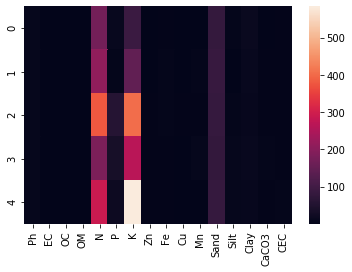

In [ ]:
sns.heatmap(X_test)

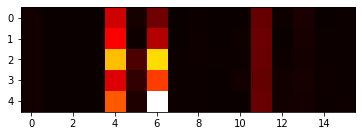

In [ ]:
plt.imshow(X_test, cmap='hot', interpolation='nearest')

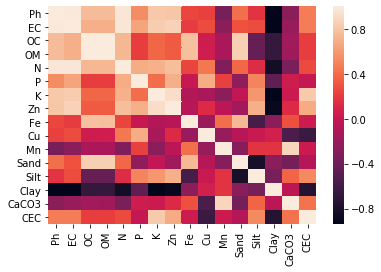

In [ ]:
sns.heatmap(X_test.corr())

In [ ]:
def convert_output(s):
    if s==0:
        return "Non-Fertile"
    else:
        return "Fertile"

res = X_test.reset_index(drop='true')
label = pd.DataFrame(testlabel.flatten())
res = pd.concat([res,label],axis=1)
res.columns = ['pH','EC','OC','OM','N','P','K','Zn','Fe','Cu','Mn','Sand','Silt','Clay','CaCO3','CEC','Output']
res.Output = res.Output.map(convert_output)

In [ ]:
for index, row in res.iterrows():
    if row['Output']=="Non-Fertile":
        print(row['pH'])

7.34


In [ ]:
print(res)
print(new)

     pH    EC    OC    OM    N   P    K    Zn   Fe    Cu    Mn   Sand  Silt   Clay  CaCO3   CEC       Output
0  7.34  0.18  0.26  0.45  172  13   90  0.28  2.6  2.10  0.80  80.99  4.69  14.32   1.90  2.69  Non-Fertile
1  7.86  0.72  0.74  1.27  212   6  148  0.55  6.2  0.18  4.70  85.91  1.58  12.51   4.30  4.01      Fertile
2  9.00  2.36  0.77  1.33  380  58  404  3.93  4.8  3.20  2.90  83.49  5.92  10.59   2.67  3.79      Fertile
3  7.52  0.63  0.30  0.51  183  36  265  2.65  3.9  0.82  8.03  78.56  8.80  12.64   6.41  4.64      Fertile
4  8.71  1.87  0.58  1.00  290  19  584  4.00  3.5  0.09  0.70  82.21  7.74  10.05   3.54  6.22      Fertile


NameError: name 'new' is not defined

In [ ]:
def Fertilize(row):
    val = 0
    
    if row['OC']<0.5:
        val = 'OC: '+ str(round(0.5 - row['OC'], 2))
        row['OC'] = 0.5
    elif row['OC']>0.75:
        val = 'OC: '+ str(round(0.75 - row['OC'], 2))
        row['OC'] = 0.75
    
    elif row['N']<280:
        val = 'N: '+ str(round(280 - row['N'], 2))
        row['N'] = 280
    elif row['N']>560:
        val = 'N: '+ str(round(560 - row['N'], 2))
        row['N'] = 560
        
    elif row['P']<12.5:
        val = 'P: '+ str(round(12.5 - row['P'], 2))
        row['P'] = 12.5
    elif row['P']>25:
        val = 'P: '+ str(round(25 - row['P'], 2))
        row['P'] = 25
        
    elif row['K']<135:
        val = 'K: '+ str(round(135 - row['K'], 2))
        row['K'] = 135
    elif row['K']>335:
        val = 'K: '+ str(round(335 - row['K'], 2))
        row['K'] = 335
        
    
        
    elif row['Zn']<0.6:
        val = 'Zn: '+ str(round(0.6 - row['Zn'], 2))
        row['Zn'] = 0.6
    elif row['Fe'] < 4.5:
        val = 'Fe: '+ str(round(4.5 - row['Fe'], 2))
        row['Fe'] = 4.5
    elif row['Cu'] < 0.2:
        val = 'Cu: '+ str(round(0.2 - row['Cu'], 2))
        row['Cu'] = 0.2
    elif row['Mn']<1:
        val = 'Mn: '+ str(round(1 - row['Mn'], 2))
        row['Mn'] = 1
        
#     elif row['pH']<6.5:
#         val = 'pH: '+ str(round(6.5 - row['pH'], 2))
#         row['pH'] = 6.5
#     elif row['pH']>8:
#         val = 'pH: '+ str(round(8 - row['pH'], 2))
#         row['pH'] = 8
        
#     elif row['EC']>2.5:
#         val = 'EC: '+ str(round(2.5 - row['EC'], 2))
#         row['EC'] = 2.5
#     elif row['EC']>1.6:
#         val = 'EC: '+ str(round(1.6 - row['EC'], 2))
#         row['EC'] = 1.6
#     elif row['EC']>0.8:
#         val = 'EC: '+ str(round(0.8 - row['EC'], 2))
#         row['EC'] = 0.8

#     sand
#     silt
#     clay
    
#     elif row['CaCO3']<5:
#         val = 'CaCO3: '+ str(round(5 - row['CaCO3'], 2))
#         row['CaCO3'] = 5
        
    return val,row

In [ ]:
final_l = []

for index, row in res.iterrows():
    if row['Output']=="Non-Fertile":
        val = 0
        new_p = 0
        l = []
        for inner_loop in range(15):
            val, row = Fertilize(row)
            if val!=0:
                l.append(val)

            n_test = row
            new = pd.DataFrame(n_test[0:16].values.reshape(1,-1))
            new.columns = ['pH','EC','OC','OM','N','P','K','Zn','Fe','Cu','Mn','Sand','Silt','Clay','CaCO3','CEC']
            new_p = rf.predict(new)
        final_l.append(l)
for i in range(len(final_l)):
    print(i,final_l[i])

0 ['OC: 0.24', 'N: 108', 'K: 45', 'Zn: 0.32', 'Fe: 1.9', 'Mn: 0.2']
